In [26]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from constant import *
from helpers import *

### 1. Data Loading

In [27]:
DATA_DIR = '../res/recipes/'

In [28]:
# Collect all the recipes for all regions
recipes_lst = []
for filename in os.listdir(DATA_DIR):
  if filename.endswith('.txt'):
    recipes_lst += read_region_file(DATA_DIR+filename)

# Create the dataframe with all the recipes
recipes_df = pd.DataFrame(
  recipes_lst, 
  columns= ['subregion', 'recipe_name', 'ingredients_inferred', 'nb_persons', 'ingredients', 'recipe_body']
)

In [29]:
recipes_df.head()

,subregion,recipe_name,ingredients_inferred,nb_persons,ingredients,recipe_body
0,Alsace,LE KUGELHOPF,with,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,Pour 6 personnes : Mettez dans une terrine 1/2...
1,Alsace,LE SCHWOWCBREDEL,with,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,Pour 6 personnes: Mélanger farine et beurre. R...
2,Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,with,-,1 kg foie gras oiseau\n1 truffe\n1 dl gelée\n1...,"1 kg de foie gras d’Alsace 1er qualité, dénerv..."
3,Alsace,TRUITES DE LA FECHT COLMARIENNE,with,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,Pour 4 personnes: Prenez 4 belles truites du t...
4,Alsace,LES SCHANKELAS,with,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,Ecraser le beurre avec la farine et bien mêler...


### 2. Data Processing

In [30]:
# Create a column for the region
recipes_df['region'] = recipes_df['subregion'].apply(
  lambda subregion: [region for region, subregions in Region2SubRegion.items() if subregion in subregions][0]
)

In [31]:
# Add the list of ingredients in tuple form for each recipe
recipes_df['ingredients_tuple'] = recipes_df.apply(process_ingredients_from_recipe, axis=1)

In [32]:
recipes_ingredients_list = []
recipes_ingredients_category = []

for idx, recipe in recipes_df.iterrows():
  ingredients_list = []
  ingredients_category = []

  for ing_tuple in recipe['ingredients_tuple']:
    ingredients_list.append(ing_tuple[2])
    ingredients_category.append(ing_tuple[3])
  
  recipes_ingredients_list.append(ingredients_list)
  recipes_ingredients_category.append(ingredients_category)

# Column containing the ingredients content for each recipe
recipes_df['ingredients_list'] = recipes_ingredients_list

# Column containing the ingredients category for each recipe
recipes_df['ingredients_category'] = recipes_ingredients_category


In [33]:
recipes_df = recipes_df[[
  'region', 'subregion', 'recipe_name', 'nb_persons', 'ingredients', 'ingredients_tuple', 
  'ingredients_list', 'ingredients_category', 'recipe_body', 'ingredients_inferred'
]]

In [34]:
recipes_df.head()

,region,subregion,recipe_name,nb_persons,ingredients,ingredients_tuple,ingredients_list,ingredients_category,recipe_body,ingredients_inferred
0,"Bourgogne, Champagne, Bresse, Franche-Comté, A...",Alsace,LE KUGELHOPF,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,"{(125, g, sucre, -), (2, -, œufs, -), (6, cl, ...","[sucre, œufs, eau-de-vie Kirsch, lait, levure ...","[-, -, -, Produit laitier, Champignon, -, Frui...",Pour 6 personnes : Mettez dans une terrine 1/2...,with
1,"Bourgogne, Champagne, Bresse, Franche-Comté, A...",Alsace,LE SCHWOWCBREDEL,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,"{(500, g, beurre, -), (3, cl, eau fleur d'oran...","[beurre, eau fleur d'oranger, œufs, amandes, é...","[-, -, -, Fruit sec, Fruit, Epice, -, Céréale]",Pour 6 personnes: Mélanger farine et beurre. R...,with
2,"Bourgogne, Champagne, Bresse, Franche-Comté, A...",Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,-,1 kg foie gras oiseau\n1 truffe\n1 dl gelée\n1...,"{(100, g, beurre, -), (1, -, truffe, Champigno...","[beurre, truffe, foie gras oiseau, gelée]","[-, Champignon, Viande, -]","1 kg de foie gras d’Alsace 1er qualité, dénerv...",with
3,"Bourgogne, Champagne, Bresse, Franche-Comté, A...",Alsace,TRUITES DE LA FECHT COLMARIENNE,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,"{(-, -, thym, Plante aromatique), (-, -, poivr...","[thym, poivre, œufs, truites, légumes, carotte...","[Plante aromatique, Epice, -, Poisson, Légume,...",Pour 4 personnes: Prenez 4 belles truites du t...,with
4,"Bourgogne, Champagne, Bresse, Franche-Comté, A...",Alsace,LES SCHANKELAS,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,"{(375, g, sucre, -), (-, -, vanille, -), (250,...","[sucre, vanille, amandes, farine, beurre, œufs...","[-, -, Fruit sec, Céréale, -, -, Fruit, -]",Ecraser le beurre avec la farine et bien mêler...,with


In [6]:
contents = collect_all_ingredient_contents(recipes_df)
print(len(contents))

632


In [11]:
for index, row in recipes_analysis.iterrows():
  content = []
  for ingredient in row['ingredients'].split('\n'):
    content.append(create_ingredient_tuple(ingredient))
  row['content'] = content
  row['ingredient'] = [c for (a, b, c) in row.content]
  category = []
  for i in row.ingredient:
    for k in Categories.keys():
      if i in Categories[k]:
        category.append(k)
  row['category'] = category
recipes_analysis

,subregion,recipe_name,ingredients_inferred,nb_persons,ingredients,recipe_body,region,content,ingredient,category
0,Alsace,LE KUGELHOPF,with,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,Pour 6 personnes : Mettez dans une terrine 1/2...,"Bourgogne, Champagne, Bresse, Franche-Comté, A...","[(0.5, litre, lait), (500, g, farine), (250, g...","[lait, farine, beurre, œufs, raisins Malaga, e...","[Produit laitier, Céréale, Epice]"
1,Alsace,LE SCHWOWCBREDEL,with,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,Pour 6 personnes: Mélanger farine et beurre. R...,"Bourgogne, Champagne, Bresse, Franche-Comté, A...","[(500, g, farine), (500, g, sucre), (500, g, a...","[farine, sucre, amandes, beurre, écorce orange...",[Céréale]
2,Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,with,-,1 kg foie gras oiseau\n1 truffe\n1 dl gelée\n1...,"1 kg de foie gras d’Alsace 1er qualité, dénerv...","Bourgogne, Champagne, Bresse, Franche-Comté, A...","[(1, kg, foie gras oiseau), (1, -, truffe), (1...","[foie gras oiseau, truffe, gelée, beurre]",[Champignon]
3,Alsace,TRUITES DE LA FECHT COLMARIENNE,with,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,Pour 4 personnes: Prenez 4 belles truites du t...,"Bourgogne, Champagne, Bresse, Franche-Comté, A...","[(4, -, truites), (8, -, écrevisses), (4, -, œ...","[truites, écrevisses, œufs, oignons, vin blanc...","[Plante aromatique, Plante aromatique, Plante ..."
4,Alsace,LES SCHANKELAS,with,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,Ecraser le beurre avec la farine et bien mêler...,"Bourgogne, Champagne, Bresse, Franche-Comté, A...","[(375, g, sucre), (250, g, amandes), (200, g, ...","[sucre, amandes, beurre, farine, œufs, citron,...","[Céréale, Agrume, Agrume]"
...,...,...,...,...,...,...,...,...,...,...
347,Lyon,"FEUILLETE AUX ORONGES ET AUX ECREVISSES, MARTELIN",without,6,écrevisse\nvin blanc\nlégumes\nvelouté de vola...,Pour 6 personnes : Faire sauter et cardinalise...,Sud-Est & Méditérannée,"[(-, -, écrevisse), (-, -, vin blanc), (-, -, ...","[écrevisse, vin blanc, légumes, velouté de vol...","[Fruit de mer, Légume, Plante aromatique, Epice]"
348,Lyon,GRAS-DOUBLE SAUTE LYONNAISE,with,6,1 kg gras-double bœuf\n2 gros oignons\n6 cl hu...,Pour 6 personnes : Emincer le gras-double en g...,Sud-Est & Méditérannée,"[(1, kg, gras-double bœuf), (2, -, gros oignon...","[gras-double bœuf, gros oignons, huile, beurre...","[Epice, Epice, Plante aromatique]"
349,Lyon,LA GALETTE LYONNAISE,with,4-5,10 pommes de terre\n150 g beurre\n3 oignons\ns...,Pour 4 ou 5 personnes : Préparer une purée de ...,Sud-Est & Méditérannée,"[(10, -, pommes de terre), (150, g, beurre), (...","[pommes de terre, beurre, oignons, sel, poivre...","[Légume, Epice, Epice, Epice]"
350,Lyon,LE SALADIER LYONNAIS,with,4,1 pied mouton\n1 foie volaille\n3 œufs\n2 hare...,Pour 4 personnes : Faire une vinaigrette bien ...,Sud-Est & Méditérannée,"[(1, -, pied mouton), (1, -, foie volaille), (...","[pied mouton, foie volaille, œufs, harengs mar...","[Plante aromatique, Plante aromatique, Plante ..."


### 3. Data Analysis

In [14]:
bycat = recipes_analysis.groupby('subregion')['category'].sum().reset_index()
bycat['category_set'] = bycat['category'].apply(lambda x: set(x))
bycat['cat_num'] = bycat['category'].apply(lambda x: len(x))
bycat

,subregion,category,category_set,cat_num
0,Alsace,"[Produit laitier, Céréale, Epice, Céréale, Cha...","{Plante aromatique, Produit laitier, Agrume, L...",18
1,Anjou,"[Epice, Epice, Epice, Viande, Epice, Epice, Pl...","{Plante aromatique, Agrume, Produit laitier, P...",46
2,Auvergne,"[Produit laitier, Produit laitier, Epice, Epic...","{Plante aromatique, Produit laitier, Champigno...",23
3,Bordelais,"[Céréale, Champignon, Agrume, Epice, Céréale, ...","{Plante aromatique, Agrume, Poisson, Champigno...",22
4,Bourgogne,"[Plante aromatique, Légume, Epice, Epice, Epic...","{Plante aromatique, Produit laitier, Agrume, L...",53
5,Bresse,"[Céréale, Produit laitier, Epice, Epice, Produ...","{Plante aromatique, Produit laitier, Légume, C...",39
6,Bretagne,"[Légume, Agrume, Plante aromatique, Plante aro...","{Plante aromatique, Agrume, Produit laitier, P...",88
7,Champagne,"[Plante aromatique, Plante aromatique, Plante ...","{Plante aromatique, Poisson, Légume, Champigno...",27
8,Charentes,"[Céréale, Plante aromatique, Agrume, Plante ar...","{Plante aromatique, Agrume, Céréale, Epice}",46
9,Corse,"[Epice, Epice, Plante aromatique, Plante aroma...","{Plante aromatique, Légume, Céréale, Viande, E...",11


<AxesSubplot:title={'center':'Distribution of number of different categories used by per region'}, ylabel='Frequency'>

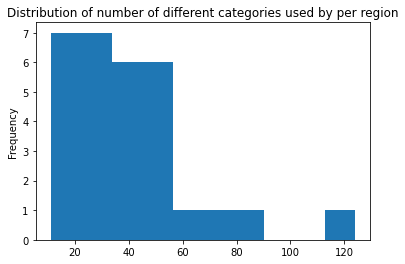

In [15]:
bycat.cat_num.plot(kind='hist',
  title='Distribution of number of different categories used by per region',
  xlabel='Number of categories')

In [16]:
bying = recipes_analysis.groupby('subregion')['ingredient'].sum().reset_index()
bying['ingredient_set'] = bying['ingredient'].apply(lambda x: set(x))
bying['ing_num'] = bying['ingredient'].apply(lambda x: len(x))
bying

,subregion,ingredient,ingredient_set,ing_num
0,Alsace,"[lait, farine, beurre, œufs, raisins Malaga, e...","{écorce orange confite, oignons, sucre, truite...",67
1,Anjou,"[échalotes, beurre, vin blanc, filet porc, lar...","{veau, bette, huile olive, jambon porc, petits...",100
2,Auvergne,"[truites, beurre, alcool Vermouth blanc, œufs,...","{court-bouillon, jambon porc, petits oignons, ...",55
3,Bordelais,"[farine, levure, œufs, beurre, sucre, fleurs d...","{jambon porc, petits oignons, petits pois écos...",75
4,Bourgogne,"[perdrix oiseau, champignons, lard porc, jambo...","{huile olive, estragon, oignons, pigeons oisea...",147
5,Bresse,"[chair de brochet, beurre, œufs, farine, lait,...","{oignons, vin blanc sec corsé, sel, échalote, ...",90
6,Bretagne,"[laitance carpes, thon nouveau, échalote, beur...","{pain, fines herbes, jus de veau, petits oigno...",172
7,Champagne,"[épaule et palette porc, bouillon, vin blanc, ...","{petit oignon, estragon, oignons, pieds cochon...",66
8,Charentes,"[moules, beurre, farine, ail, œuf, citron, per...","{fines herbes, menthe, estragon, oignons, sucr...",103
9,Corse,"[merle oiseau, filet de porc, foie de porc, pa...","{poivrons, sucre, olives dénoyautées, sel, lev...",35


<AxesSubplot:title={'center':'Distribution of number of different ingredients used by per region'}, ylabel='Frequency'>

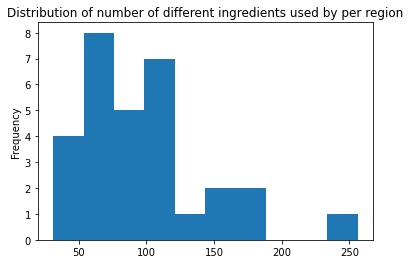

In [17]:
bying.ing_num.plot(kind='hist',
  title='Distribution of number of different ingredients used by per region',
  xlabel='Number of ingredients')

In [19]:
bycat

,subregion,category,category_set,cat_num
0,Alsace,"[Produit laitier, Céréale, Epice, Céréale, Cha...","{Plante aromatique, Produit laitier, Agrume, L...",18
1,Anjou,"[Epice, Epice, Epice, Viande, Epice, Epice, Pl...","{Plante aromatique, Agrume, Produit laitier, P...",46
2,Auvergne,"[Produit laitier, Produit laitier, Epice, Epic...","{Plante aromatique, Produit laitier, Champigno...",23
3,Bordelais,"[Céréale, Champignon, Agrume, Epice, Céréale, ...","{Plante aromatique, Agrume, Poisson, Champigno...",22
4,Bourgogne,"[Plante aromatique, Légume, Epice, Epice, Epic...","{Plante aromatique, Produit laitier, Agrume, L...",53
5,Bresse,"[Céréale, Produit laitier, Epice, Epice, Produ...","{Plante aromatique, Produit laitier, Légume, C...",39
6,Bretagne,"[Légume, Agrume, Plante aromatique, Plante aro...","{Plante aromatique, Agrume, Produit laitier, P...",88
7,Champagne,"[Plante aromatique, Plante aromatique, Plante ...","{Plante aromatique, Poisson, Légume, Champigno...",27
8,Charentes,"[Céréale, Plante aromatique, Agrume, Plante ar...","{Plante aromatique, Agrume, Céréale, Epice}",46
9,Corse,"[Epice, Epice, Plante aromatique, Plante aroma...","{Plante aromatique, Légume, Céréale, Viande, E...",11


In [36]:
heatmap_df = pd.DataFrame(0, columns=Categories.keys(), index=recipes_df.subregion.unique())
for index, row in recipes_analysis.iterrows():
  new_row = heatmap_df.loc[row.subregion]
  for c in row.category:
    new_row[c] += 1
heatmap_df

,Viande,Poisson,Fruit de mer,Alcool,Plante aromatique,Epice,Produit laitier,Légume,Fruit,Agrume,Céréale,Légumineuse,Fruit sec,Champignon
Alsace,0,0,0,0,3,2,2,1,1,2,6,0,0,1
Limousin,4,0,0,0,10,15,2,4,0,0,3,0,0,1
Bretagne,1,3,0,0,26,32,8,8,0,5,5,0,0,0
Provence,0,4,0,0,27,16,3,6,0,1,3,0,0,0
Anjou,4,2,0,0,7,21,2,3,0,1,5,0,0,1
Normandie,4,0,1,2,12,30,4,8,0,8,5,0,0,1
Bordelais,0,1,0,0,9,5,0,0,0,2,4,0,0,1
Nord,7,0,0,1,13,9,1,9,0,1,4,0,0,1
Franche-Comté,3,2,0,0,9,25,3,1,1,3,4,0,0,0
Corse,1,0,0,0,2,6,0,1,0,0,1,0,0,0


<AxesSubplot:>

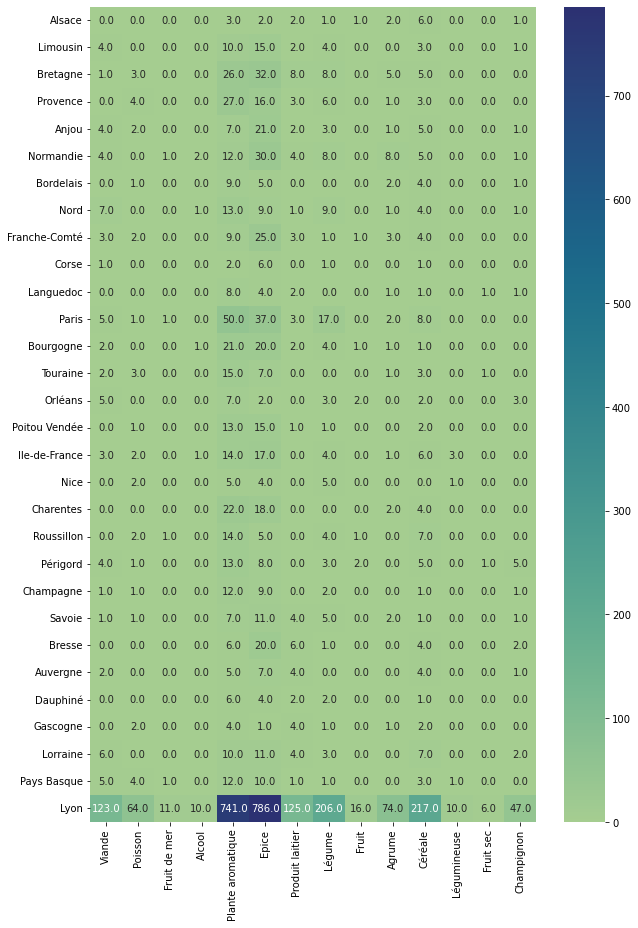

In [57]:
plt.figure(figsize=(10, 15))
# plt.title('Heatmap of categories by region')
sns.heatmap(heatmap_df, cmap="crest", annot=True, fmt=".1f")

<AxesSubplot:>

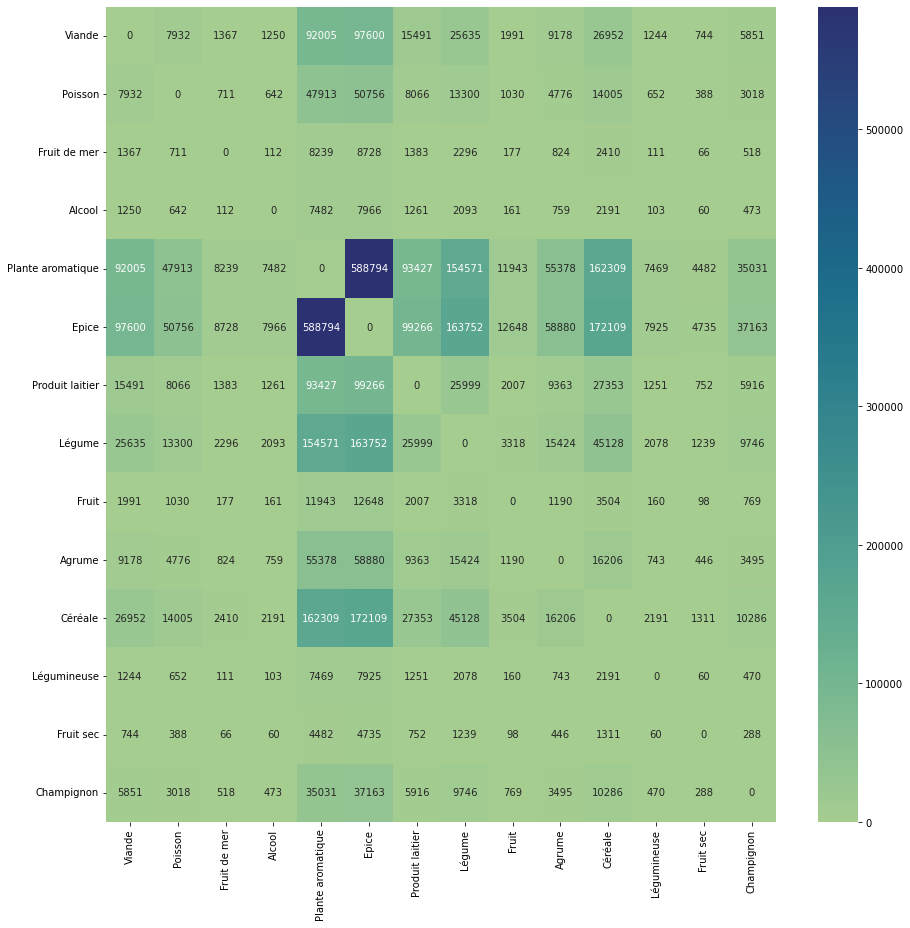

In [54]:
coocc = heatmap_df.T.dot(heatmap_df)
np.fill_diagonal(coocc.values, 0)
plt.figure(figsize=(15, 15))
sns.heatmap(coocc, cmap="crest", annot=True, fmt=".8g")

In [35]:
heatmap_df2 = pd.DataFrame(0, columns=Categories.keys(), index=recipes_df.subregion.unique())
for index, row in recipes_analysis.iterrows():
  new_row = heatmap_df2.loc[row.subregion]
  for c in row.category:
    for tup in row.content:
      for k in Categories.keys():
        if tup[2] in Categories[k]:
          if tup[0] == '-':
            new_row[c] += 1
          else:
            new_row[c] += float(tup[0])
heatmap_df2
    

,Viande,Poisson,Fruit de mer,Alcool,Plante aromatique,Epice,Produit laitier,Légume,Fruit,Agrume,Céréale,Légumineuse,Fruit sec,Champignon
Alsace,0,0,0,0,12,4,514,501,501,504,1716,0,0,1
Limousin,20,0,0,0,54,66,15,25,0,0,24,0,0,3
Bretagne,3,857,0,0,1270,2031,450,805,0,21,380,0,0,0
Provence,0,1013,0,0,285,203,7,1056,0,0,1008,0,0,0
Anjou,71,70,0,0,198,472,183,17,0,65,357,0,0,2
Normandie,16,0,6,15,552,374,15,538,0,34,267,0,0,6
Bordelais,0,26,0,0,26,44,0,0,0,35,81,0,0,32
Nord,62,0,0,0,652,729,1,689,0,6,445,0,0,2
Franche-Comté,19,10,0,0,58,377,21,7,2,21,144,0,0,0
Corse,0,0,0,0,8,56,0,0,0,0,22,0,0,0


<AxesSubplot:>

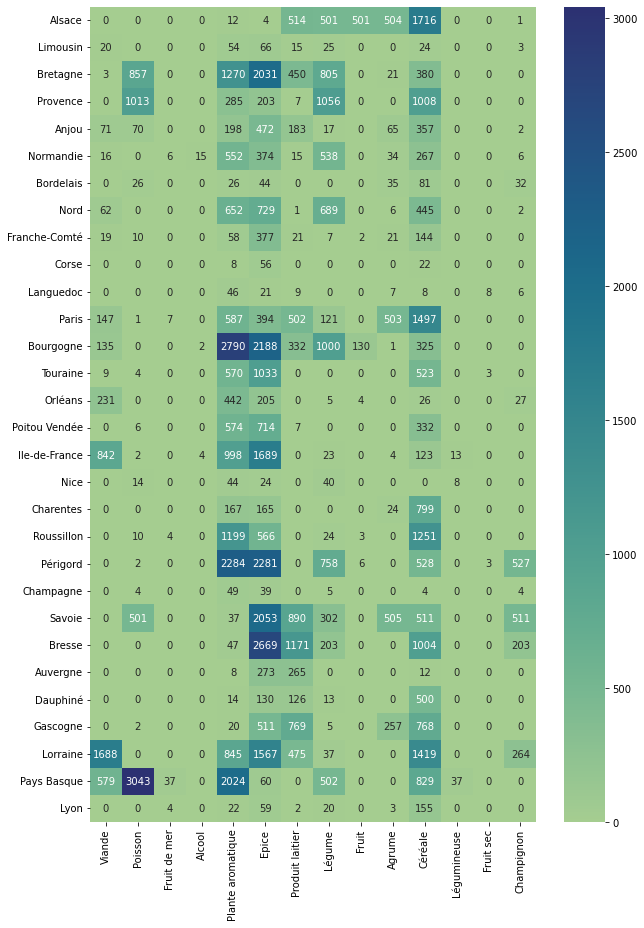

In [56]:
plt.figure(figsize=(10, 15))
sns.heatmap(heatmap_df2, cmap="crest", annot=True, fmt=".6g")

<AxesSubplot:>

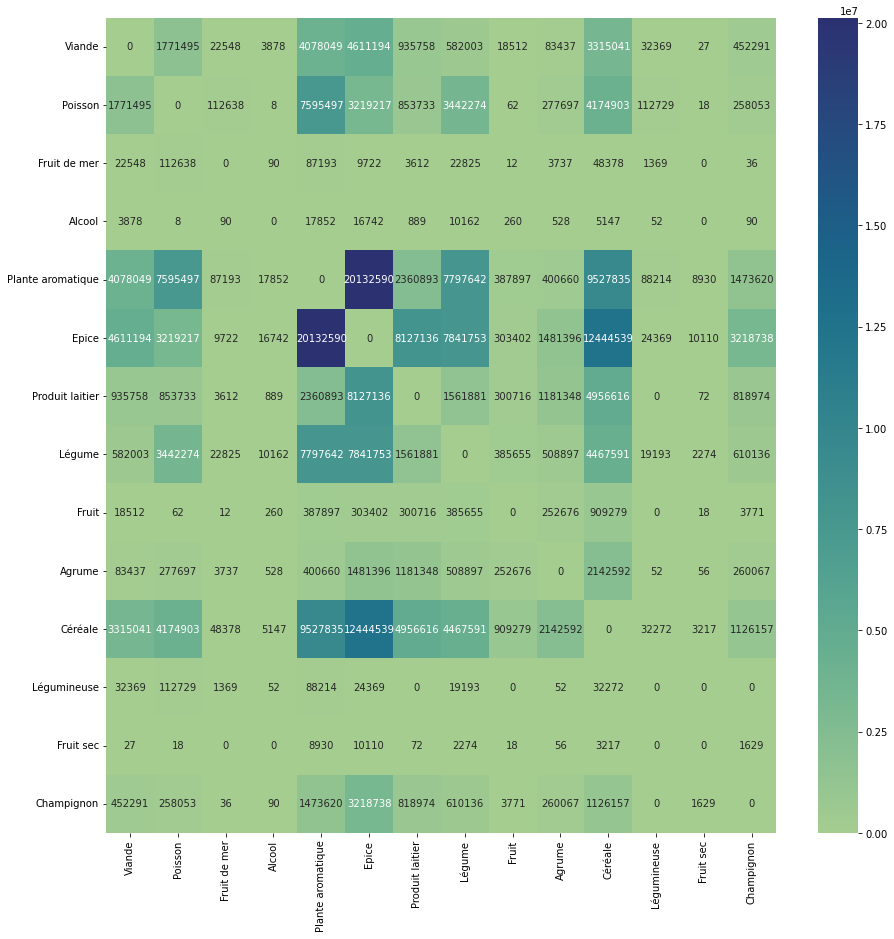

In [53]:
coocc2 = heatmap_df2.T.dot(heatmap_df2)
np.fill_diagonal(coocc2.values, 0)
plt.figure(figsize=(15, 15))
sns.heatmap(coocc2, cmap="crest", annot=True, fmt=".8g")